In [3]:
import sys
sys.path.append("..")
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
from writeit import rewritePipes
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
def idx_t(i,j,n,N):
    return (2*(N+2)*n+(N+2)*i+j)

Manning coeff = 0.000 and a0/Af = 0.000
Inflow Volume = 80.12
Manning coeff = 0.000 and a0/Af = 0.100
Inflow Volume = 70.36
Manning coeff = 0.000 and a0/Af = 0.200
Inflow Volume = 60.63
Manning coeff = 0.000 and a0/Af = 0.300
Inflow Volume = 50.87
Manning coeff = 0.008 and a0/Af = 0.000
Inflow Volume = 78.74
Manning coeff = 0.008 and a0/Af = 0.100
Inflow Volume = 69.00
Manning coeff = 0.008 and a0/Af = 0.200
Inflow Volume = 59.45
Manning coeff = 0.008 and a0/Af = 0.300
Inflow Volume = 49.86
Manning coeff = 0.015 and a0/Af = 0.000
Inflow Volume = 61.32
Manning coeff = 0.015 and a0/Af = 0.100
Inflow Volume = 61.31
Manning coeff = 0.015 and a0/Af = 0.200
Inflow Volume = 58.09
Manning coeff = 0.015 and a0/Af = 0.300
Inflow Volume = 48.34


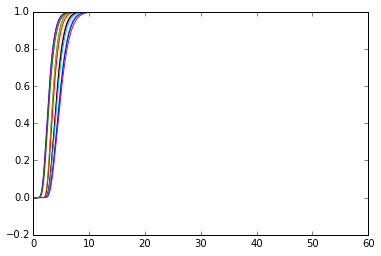

In [5]:
mtype =1
Np=2
kw = 4500/86400.
Ds = [1.]*Np
jt = [1,2,1]
bt = [1,1,1]
bv = [0,0,0]
r =  [-1,0,1]
h0s =[0.]*Np
q0s =[0.]*Np

Ls = [100.,100]
Ns = [int(L) for L in Ls]
T = 60
M = 7200
Mi =10
a = 100
elevs = [0,0,0]
H = []
C = []
N = Ns[0]
t = np.linspace(0,T,M+1)
dt = T/float(M)
A0 = 0.792325375237 #corresponds to H = 10(verify?)
Qin = A0*np.ones(M+1)
a0 = A0*np.ones(N)
q0 = np.ones(N)
q1 = np.zeros(N)
Cl0 = np.ones(N)
Cl1 = np.zeros(N)
C00 = np.ones(M+1)
C01 = np.ones(M+1)
fn = "../indata/testfill"
oldinp = "../indata/2pipes.inp"
J = 3;
K = 4;
Mrtest=[0.00, 0.008, 0.015]
Ctemp = []
for jj in range(0,J):
    Mr = Mrtest[jj]
    Mrs = [Mr]*Np
    for ii in range(K):
        a1 = .1*(ii)*np.ones(N+1)
        (fi, fc) = rewritePipes(fn,oldinp, Ns, Ls, Mrs, Ds, jt, bt, bv, r, h0s, q0s, T, M, a,elevs)
        n0 = PyNetwork(fi, fc, mtype)
        n0.setIC(0,a0,q0)
        n0.setIC(1,a1,q1)
        n0.setbVal(0,Qin)
        
        n0.setClbVal(0,C00)
        n0.setClbVal(1,C01)
        n0.setCl0(0,Cl0)
        n0.setCl0(1,Cl1)
        n0.setClkw(0,kw)
        n0.setClkw(1,kw)
        V0 = n0.getTotalVolume()
        n0.runForwardProblem(dt) 
        print "Manning coeff = %.3f and a0/Af = %.3f"%(Mr,a1[0])
        print "Inflow Volume = %.2f"%(n0.getTotalVolume()-V0)
        p0 = PyPipe_ps(Ns[0], Ds[0], Ls[0], M, a)
        qf = n0.qhist(1)
        Nstar = 10
        H.append([p0.pbar(qf[idx_t(0,Nstar,n,Ns[0])],False) for n in range(M+1)])
        C.append(np.copy(n0.Clhist(1)[Nstar::(Ns[0]+2)]))
        C2 = n0.Clhist(1)[Nstar::(N+2)]
        plot(t,C2[0:-1])

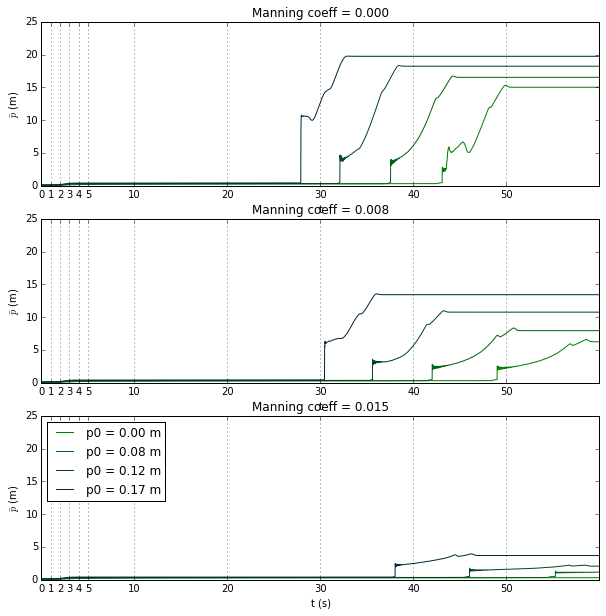

In [25]:
fig, ax = plt.subplots(figsize = (10,10),nrows=J)
from matplotlib import cm
import matplotlib.colors as colors
cmap = cm.get_cmap('ocean')
cnorm =colors.Normalize(vmin=0, vmax = len(H)+1)
scalarMap = cm.ScalarMappable(norm =cnorm, cmap= cmap)
for j in range(J):    
    for kk in range(K):
        cval = scalarMap.to_rgba(kk)
        ax[j].plot(t,H[kk+K*j],color = cval, label = "p0 = %.2f m"%p0.pbar(.1*kk,False))
    ax[j].set_xticks([0,1,2,3,4,5,10,20,30,40,50])
    ax[j].xaxis.grid(True)

    legend(loc = "lower right")
    legend(loc = "upper left")
    ax[j].set_title("Manning coeff = %.3f"%Mrtest[j])
    ax[j].set_ylim(0,25)
    ax[j].set_ylabel(r'$\bar{p}$ (m)')
    ax[j].set_xlabel('t')
    #ax[j].set_ylim(0,.5)
gca().set_xlabel('t (s)')

In [2]:
fig, ax = plt.subplots(figsize = (10,10),nrows=J)
from matplotlib import cm
import matplotlib.colors as colors
cmap = cm.get_cmap('ocean')
cnorm =colors.Normalize(vmin=0, vmax = 15)
scalarMap = cm.ScalarMappable(norm =cnorm, cmap= cmap)
t = np.linspace(0,n0.T,n0.M+1)
for j in range(J):    
    for kk in range(K):
        cval = scalarMap.to_rgba(kk+K*j)
        #print kk+K*j
        ax[j].plot(t,C[kk+K*j][0:-1],color = cval, label = "p0 = %.2f m"%p0.pbar(.1*kk,False))
        ax[j].legend(loc = "lower right")
        ax[j].set_xticks([0,1,2,3,4,5,10,20,30,40,50])
        ax[j].xaxis.grid(True)
        ax[j].set_ylim(0,1.05)
        ax[j].set_ylabel('C')
    ax[j].set_title("Manning coeff = %.3f"%Mrtest[j])
gca().set_xlabel('t (s)')


NameError: name 'plt' is not defined

100


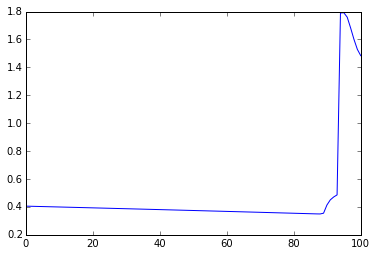

In [8]:
p2 = [p0.pbar(qf[idx_t(0,k,M/2,Ns[0])],False) for k in range(N)]
x = linspace(0,Ls[0],N)
plot(x,p2)
print N

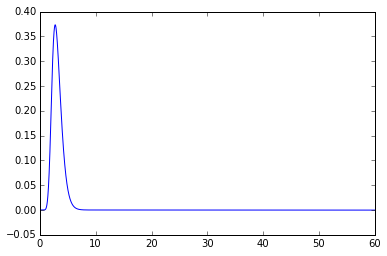

In [9]:
plot(t,C[0][0:-1]-C[1][0:-1])

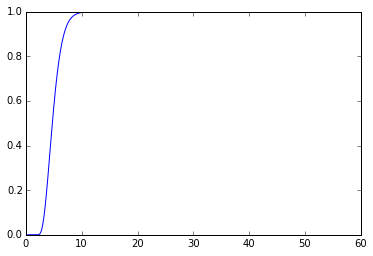

In [10]:
C2 = n0.Clhist(1)[Nstar::(N+2)]
plot(t,C2[0:-1])

In [11]:
C[1]

array([ 0.        ,  0.        ,  0.        , ...,  0.99756714,
        0.99756707,  0.        ])

In [12]:
print C[0]

[ 0.          0.          0.         ...,  0.99736132  0.99736125  0.        ]


In [13]:
print max(Ctemp[0])

IndexError: list index out of range